# **Experiment tracking**

**If you are working in a finance company and are tasked with creating a ml model that based on certain conditions classify if the applicant should be given a loan or not**

In [33]:
import pandas as pd
import numpy as np

In [34]:
!gdown "1WuI9yiGKLpSJo5yQIfP5VGavbwAAELZT"

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
train_df = pd.read_csv("data.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


**Binary Encoding of Categorical Variables**

In [37]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


**Checking for Missing Values**

In [39]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Segregating the target variable from the features**

In [41]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

**Splitting the data**

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

### **Model Training - RandomForestClassifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Cross Validation**

**accuracy_score on the Validation data -**

In [44]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

**accuracy_score on the train data -**

In [45]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

**Explanation -**

1. `model.predict(X_val)`

* You’re using your trained ML model to **make predictions** on your **validation data** (`X_val`).
* These are the **inputs** the model hasn’t seen before

🟢 `pred_val` = model’s predicted labels for the validation data.

---

2. `accuracy_score(y_val, pred_val)`

* `y_val` = **true labels** (actual outcomes) for the validation set.
* `pred_val` = **predicted labels** (model’s guesses).

---

3. `model.predict(X_train)`

* Here, you predict on **training data** — the same data your model learned from.

🟢 `pred_train` = model’s predicted labels for the training data.

---

4. `accuracy_score(y_train, pred_train)`

* This calculates accuracy **on the training set**.

✅ It shows how well the model fits the data it was trained on.

---





<br>

<br>

**These are not the best ways of keeping track of the work and experiments that you perform**

**We need to create something that easy to manage, clearly shows the results and metrics, logs the changes and hyperparameters for us.**

# **ML Flow**

https://mlflow.org/

**MLflow is an open-source platform to manage Machine Learning Lifecycle. In layman’s terms, it can track and store data, parameters, and metrics to be retrieved later or displayed nicely on a web interface.**




**MLflow** helps you **track**, **organize**, and **reproduce** your Machine Learning experiments — like a project manager for your models.

It keeps track of everything your model does:

* What data it trained on
* What parameters you used
* What accuracy or loss you got
* What files or models were created

---

<br>

## **ML flow Tracking**


MLflow Tracking is an API-based tool for logging metrics, parameters, model versions, code versions, and files. MLflow Tracking is integrated with a UI for visualizing and managing artifacts, models, files, etc.

Each MLflow Tracking session is organized and managed under the concept of runs.
* A run refers to the execution of code where the artifact log is performed explicitly.

By default, the runs are stored in the directory where the code session is executed. However, MLflow also allows storing artifacts on a local or remote server, for better collaboration.


---

### **MLflow Tracks 4 Key Things**

When you run a model with MLflow, it saves 4 important kinds of information:

| Type                        | Meaning                                    | Example                                                                  |
| --------------------------- | ------------------------------------------ | ------------------------------------------------------------------------ |
| **1️⃣ Parameters (params)** | Settings you used while training           | learning_rate=0.01, n_estimators=100                                     |
| **2️⃣ Metrics**             | Numbers that measure performance           | accuracy=0.92, loss=0.12                                                 |
| **3️⃣ Artifacts**           | Output files (anything your code produces) | Trained model (`.pkl`, `.h5`), plots, confusion matrix, dataset snapshot |
| **4️⃣ Metadata / Tags**     | Descriptive info about the run             | “experiment name = Loan Prediction v1”                                   |

---



<br>

### **Getting started**

In [46]:
!pip3 install mlflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import mlflow
import os

**Set the Experiment name - `loan_status`**

In [48]:
mlflow.set_experiment("loan_status")

<Experiment: artifact_location='file:///c:/Users/LENOVO/Desktop/MLOps/OCT-Flask-Web-App/mlruns/167638310548004575', creation_time=1762330257750, experiment_id='167638310548004575', last_update_time=1762330257750, lifecycle_stage='active', name='loan_status', tags={'mlflow.experimentKind': 'custom_model_development'}>

**Parameters** are something you want to tune based on the metrics, whereas tags are some extra information that doesn't necessarily associate with the model's performance. there's no hard constraint on which to use to log which; they can be used interchangeably without error.

In [49]:
with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    mlflow.set_tag('mlflow.runName','first_run')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)

    mlflow.sklearn.log_model(model_rf, "model")



2025/11/07 15:34:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:34:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


<br>

<br>

**we can use this with command to start the ml flow run and whatever we do inside of that start_run indent will be tracked**

**Inside that we create our first model and log the different parameters and metric for that model**

**we set the name of the run and log the max depth of the rf model and also the acc score. All of the parameters and models are stored in files in the experiment folder with each runs having seperate folders. you can open those files to see the stored data**


<br>

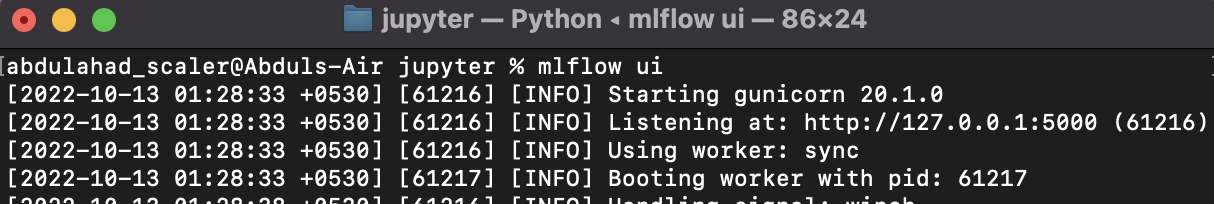

**MLflow also provides the option to view all the runs and experiments on a web based ui that is really easy to use and see the logged data.**


In [52]:
!mlflow ui --port 5000


^C


<br>

**Result -**

### **Go to column and choose what you want in the output -**

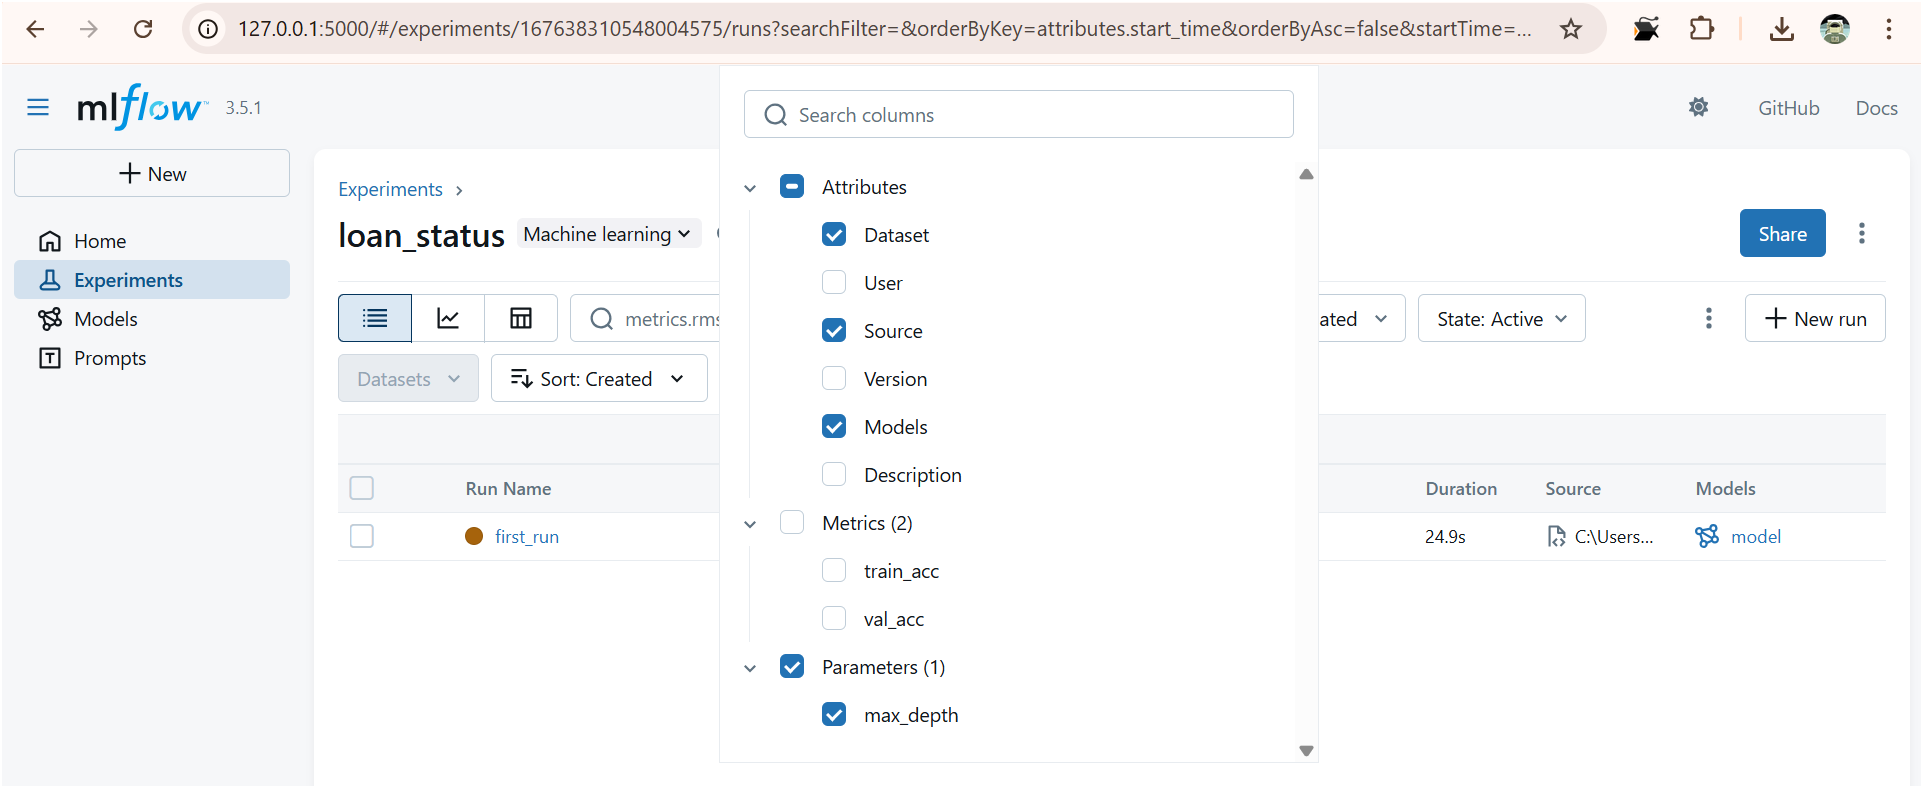

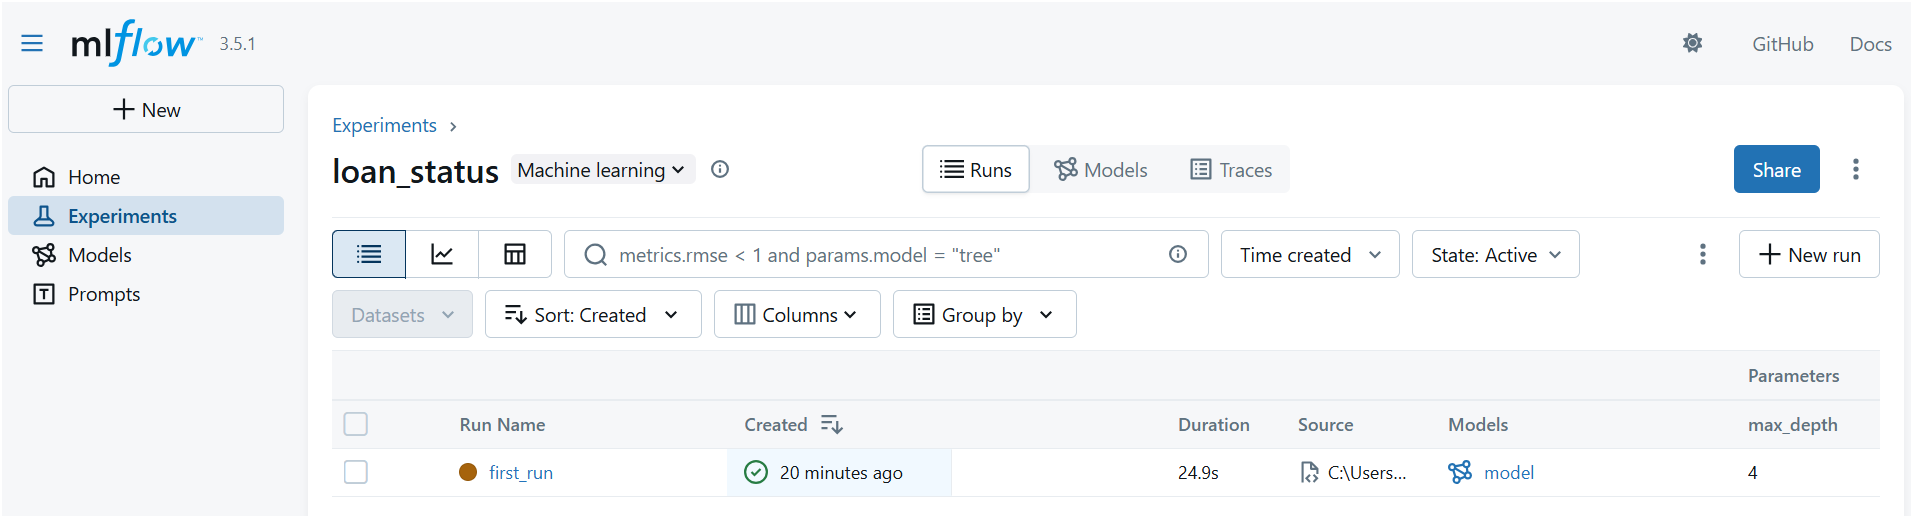

**Here is the web ui launched on a browser**,

**As you can see we are under the loan_status experiment name and have a run that we created with the name first_run.**

**There are several other informations as well like the source code that we used, the user that created, that run and the model that we stored**

**If we click on any particular run we can see more details about that run. we have here the all the details that we logged for that particular model in a very easy to understand fashion**

### **Load the new data and proceed furthur**

In [ ]:
!gdown 1i3d-J__3Rqgny0xriKtq5EkA_3FKRdQD

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
train_df = pd.read_csv('data_new.csv')
train_df.head()

train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df = train_df.dropna()

X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
with mlflow.start_run():
    model_rf = RandomForestClassifier(max_depth=4, random_state=5)
    model_rf.fit(X_train, y_train)

    pred_val = model_rf.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = model_rf.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    mlflow.set_tag('mlflow.runName','new_data')
    mlflow.log_param('max_depth',4)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    mlflow.sklearn.log_model(model_rf, "model")



2025/11/07 15:25:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:26:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**If we go back to the web ui we can see that we have another run logged
with the information we have we changed we added a new name and the name of the datafile**

### **Now if we want to tune the RF model**
- finding the best set of hyperparameters that gives the highest performance on validation data.

In [ ]:

def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(X_train, y_train)

        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        run="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName',run)
        mlflow.log_param('n_estimators',n_est)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")

**Manually typing all the parameters-**

In [ ]:
# mlflow_runs(10,2,1)
# mlflow_runs(20,2,2)
# mlflow_runs(40,2,3)
# mlflow_runs(10,4,4)
# mlflow_runs(20,4,5)
# mlflow_runs(40,4,6)
# mlflow_runs(10,8,7)
# mlflow_runs(20,8,8)
# mlflow_runs(40,8,9)

**Automate hyperparameter tuning using nested loops -**

In [ ]:
# Define the hyperparameter values you want to try
n_estimators_list = [10, 20, 40]
max_depth_list = [2, 4, 8]

# Counter to track run number
i = 1

# Loop through all combinations of parameters
for n_est in n_estimators_list:
    for max_dep in max_depth_list:
        print(f"Running MLflow experiment {i} with n_estimators={n_est} and max_depth={max_dep}")
        mlflow_runs(n_est, max_dep, i)
        i += 1


Running MLflow experiment 1 with n_estimators=10 and max_depth=2


2025/11/07 15:26:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:26:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/07 15:26:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Running MLflow experiment 2 with n_estimators=10 and max_depth=4


2025/11/07 15:26:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/07 15:26:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Running MLflow experiment 3 with n_estimators=10 and max_depth=8


2025/11/07 15:26:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running MLflow experiment 4 with n_estimators=20 and max_depth=2


2025/11/07 15:26:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:26:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running MLflow experiment 5 with n_estimators=20 and max_depth=4


2025/11/07 15:26:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:27:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running MLflow experiment 6 with n_estimators=20 and max_depth=8


2025/11/07 15:27:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:27:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running MLflow experiment 7 with n_estimators=40 and max_depth=2


2025/11/07 15:27:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:28:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running MLflow experiment 8 with n_estimators=40 and max_depth=4


2025/11/07 15:28:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:28:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Running MLflow experiment 9 with n_estimators=40 and max_depth=8


2025/11/07 15:28:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 15:29:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


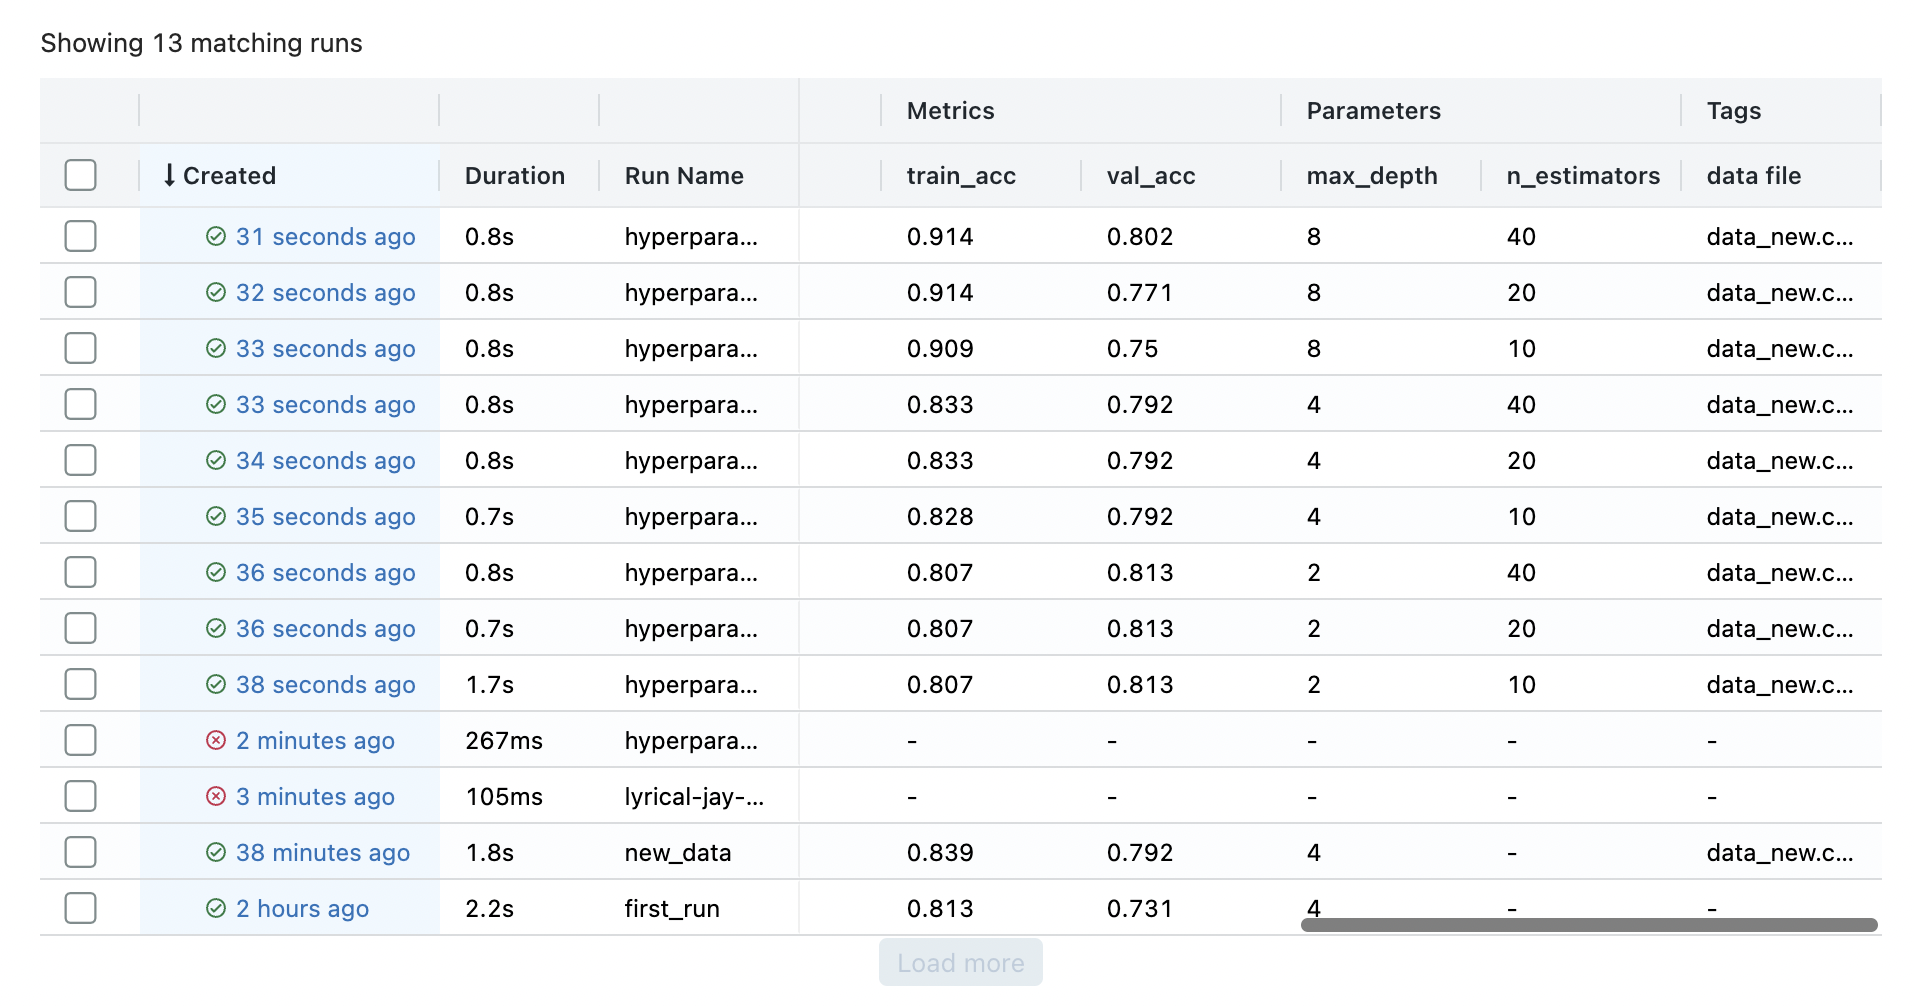

**here we can see there are 9 new runs that show how our model performed**
* we can see that increasing the number of tress improves the model a lot
* if we have a deep model with less number of trees it seems to overfit because the train accuracy is very high but the val. accuracy is low.

you can also see there are two failed runs so they have no data associated with them

**now if you want to try out another model like knn for this task**


<br>


### **Knn Model**

2025/11/07 07:33:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 07:33:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


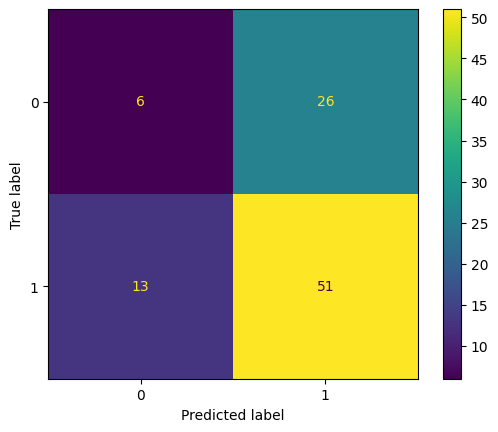

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    pred_val = knn_model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    run="KNN"
    mlflow.set_tag('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, "model")

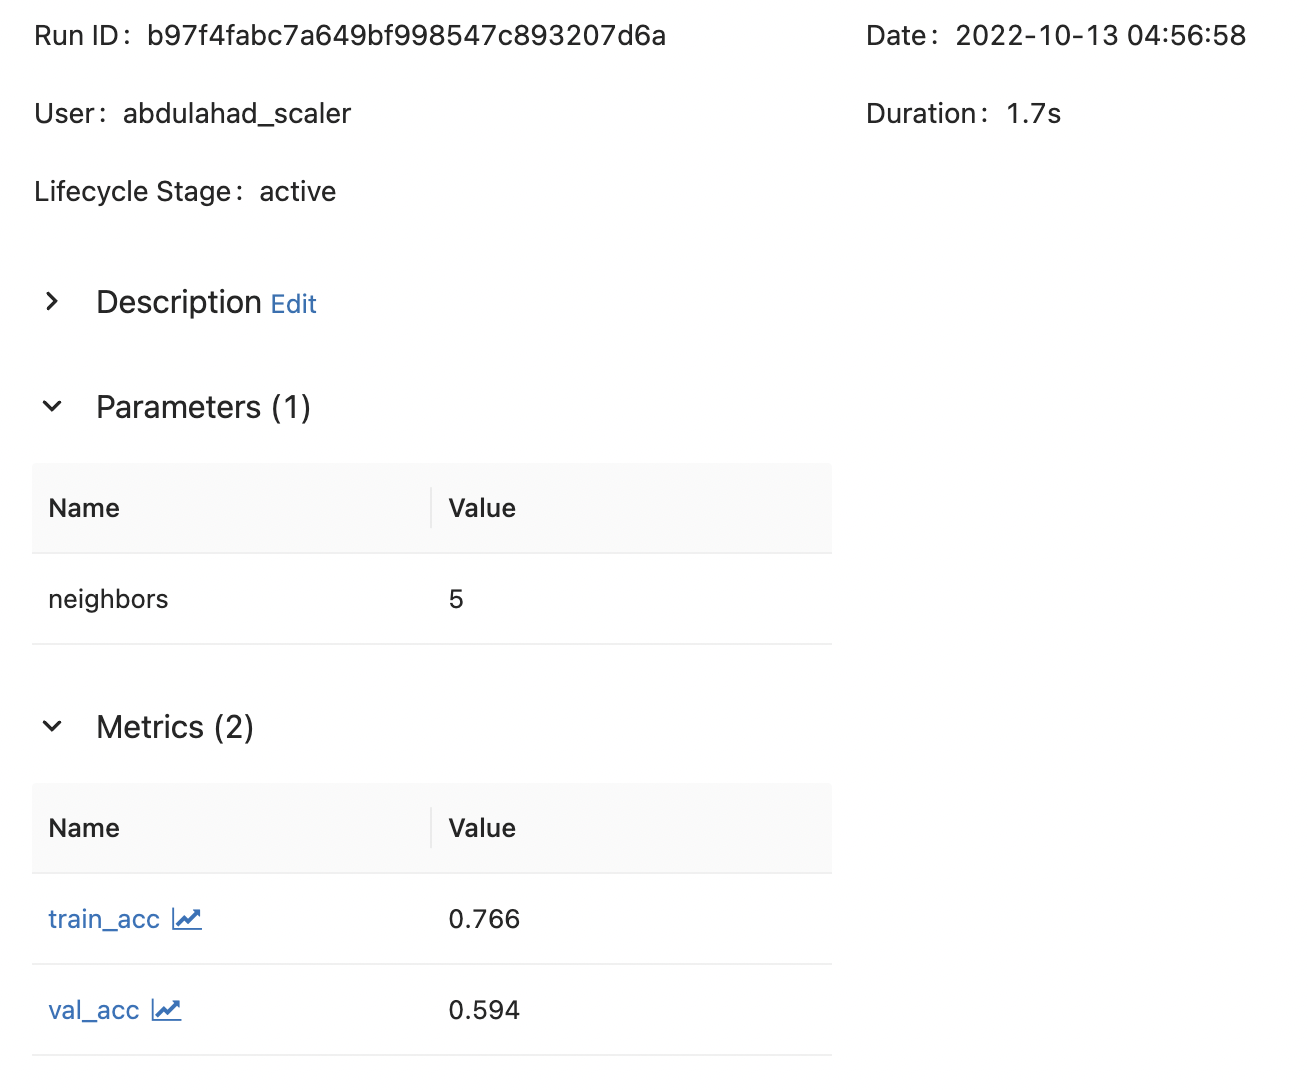

**after all,**

 **The testing and trying we can say that we will chose the random forest model with max depth =8 and number of trees=40**

<br>

<br>

**EXTRA-**

**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn

# Start MLflow run
with mlflow.start_run():

    # 1️⃣ Train Model
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    # 2️⃣ Predictions
    pred_train = knn_model.predict(X_train)
    pred_val = knn_model.predict(X_val)

    # 3️⃣ Metrics
    train_acc = accuracy_score(y_train, pred_train)
    val_acc = accuracy_score(y_val, pred_val)

    # 4️⃣ Log Run Info
    run = "KNN"
    mlflow.set_tag('mlflow.runName', run)
    mlflow.set_tag('data file', 'data_new.csv')
    mlflow.log_param('neighbors', 5)

    mlflow.log_metric('train_acc', train_acc)
    mlflow.log_metric('val_acc', val_acc)

    # 5️⃣ Confusion Matrix (Validation Data)
    cm = ConfusionMatrixDisplay.from_predictions(y_val, pred_val)
    cm.figure_.suptitle("KNN - Confusion Matrix (Validation Data)")
    cm.figure_.tight_layout()
    cm.figure_.savefig('confusion_mat.png')
    plt.close(cm.figure_)  # Close to avoid duplicate figures
    mlflow.log_artifact('confusion_mat.png')

    # 6️⃣ Compare Train vs Validation Accuracy (Visual)
    plt.figure(figsize=(6,4))
    plt.bar(['Train Accuracy', 'Validation Accuracy'], [train_acc, val_acc], color=['skyblue', 'lightgreen'])
    plt.title('KNN Model Performance Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('accuracy_comparison.png')
    plt.close()
    mlflow.log_artifact('accuracy_comparison.png')

    # 7️⃣ Classification Report (for deeper insight)
    report = classification_report(y_val, pred_val, output_dict=False)
    with open("classification_report.txt", "w") as f:
        f.write(report)
    mlflow.log_artifact("classification_report.txt")

    # 8️⃣ Log Model
    mlflow.sklearn.log_model(knn_model, "model")

    print("Train Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)
    print("\nClassification Report:\n", report)


2025/11/07 07:35:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 07:35:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Train Accuracy: 0.765625
Validation Accuracy: 0.59375

Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.19      0.24        32
           1       0.66      0.80      0.72        64

    accuracy                           0.59        96
   macro avg       0.49      0.49      0.48        96
weighted avg       0.55      0.59      0.56        96

